In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
file = "Resources/all.csv"
data = pd.read_csv(file)
df = pd.DataFrame(data)

## Brandon
Is there a correlation between age/literacy, and the number of amenities that are present in each district?

In [14]:
# Create and clean a new DF
columns = ["State", "District", "Persons", "Persons..literate", "Persons..literacy.rate", "Drinking.water.facilities", "Safe.Drinking.water","Post..telegraph.and.telephone.facility", "Primary.Health.Centre", "Bus.services"]
ageLit_df = df[columns]

# Replace any "-" with NaN, and then get rid of any NaNs.
ageLit_df = ageLit_df.replace("-", np.nan)
ageLit_df = ageLit_df.dropna(how="any")

# Rename the columns so they are nice and uniform
ageLit_df = ageLit_df.rename(columns = {"Persons":"Population", "Persons..literate":"Total Literate", "Persons..literacy.rate":"Total Literacy Rate", "Drinking.water.facilities":"Total Drinking Water Facilities", "Safe.Drinking.water":"Safe Drinking Water Facilities","Post..telegraph.and.telephone.facility":"Post/Telegraph/Telephone Facilities", "Primary.Health.Centre":"Primary Health Centers", "Bus.services":"Bus Services"})

# Reformat percentages to be real numbers
ageLit_df["Total Literacy Rate"] = ageLit_df["Total Literacy Rate"]/100

In [16]:
# Convert to numeric values so they can be worked with
ageLit_df["Primary Health Centers"] = pd.to_numeric(ageLit_df["Primary Health Centers"])
ageLit_df["Bus Services"] = pd.to_numeric(ageLit_df["Bus Services"])

# Add a few columns for analysis
ageLit_df["Percent Clean Water Facilities"] = (ageLit_df["Safe Drinking Water Facilities"]/ageLit_df["Total Drinking Water Facilities"])
ageLit_df["People per Communication Facility"] = round(ageLit_df["Population"]/ageLit_df["Post/Telegraph/Telephone Facilities"],2)
ageLit_df["People per Drinking Facility"] = round(ageLit_df["Population"]/ageLit_df["Total Drinking Water Facilities"],2)
ageLit_df["People per Bus Service"] = round(ageLit_df["Population"]/ageLit_df["Bus Services"],2)
ageLit_df["People per Primary Health Center"] = round(ageLit_df["Population"]/ageLit_df["Primary Health Centers"],2)
ageLit_df.head()

,State,District,Population,Total Literate,Total Literacy Rate,Total Drinking Water Facilities,Safe Drinking Water Facilities,Post/Telegraph/Telephone Facilities,Primary Health Centers,Bus Services,Percent Clean Water Facilities,People per Communication Facility,People per Drinking Facility,People per Bus Service,People per Primary Health Center
0,AN,"District Andamans (01), Andaman & Nicobar Isla...",314084,226600,0.8249,331.0,293.0,161.0,16,187,0.885196,1950.83,948.89,1679.59,19630.25
1,AN,"District Nicobars (02), Andaman & Nicobar Isla...",42068,26535,0.7235,169.0,163.0,36.0,4,49,0.964497,1168.56,248.92,858.53,10517.00
2,Andhra,"District Adilabad (01), Andhra Pradesh (28)",2488003,1112189,0.5268,1585.0,1580.0,558.0,61,814,0.996845,4458.79,1569.72,3056.51,40786.93
3,Andhra,"District Nizamabad (02), Andhra Pradesh (28)",2345685,1044788,0.5202,854.0,854.0,602.0,50,746,1.000000,3896.49,2746.70,3144.35,46913.70
4,Andhra,"District Karimnagar (03), Andhra Pradesh (28)",3491822,1661089,0.5490,1047.0,1046.0,795.0,70,912,0.999045,4392.23,3335.07,3828.75,49883.17


State                                   object
District                                object
Population                               int64
Total Literate                           int64
Total Literacy Rate                    float64
Total Drinking Water Facilities        float64
Safe Drinking Water Facilities         float64
Domestic Electricity                    object
Post/Telegraph/Telephone Facilities    float64
Primary Health Centers                  object
Bus Services                            object
Percent Clean Water Facilities         float64
People per Communication Facility      float64
Drinking Facility                      float64
dtype: object

## Jake

## Laura

## Matt

## Kevin

Drinking.water.facilities  Safe.Drinking.water
State                                                           
UP                                  96498.0              96444.0
MP                                  51678.0              51505.0
Orrisa                              45765.0              45071.0
Maharashtra                         40918.0              40810.0
Rajasthan                           39646.0              38394.0
Bihar                               39032.0              38935.0
WB                                  37736.0              37605.0
Jharkhand                           29354.0              29028.0
Andhra                              25264.0              23794.0
Assam                               25123.0              24067.0
Karnataka                           24270.0              24146.0
CG                                  19468.0              19379.0
Gujarat                             18055.0              18009.0
HP                                  17454.0

<Figure size 144x360 with 0 Axes>

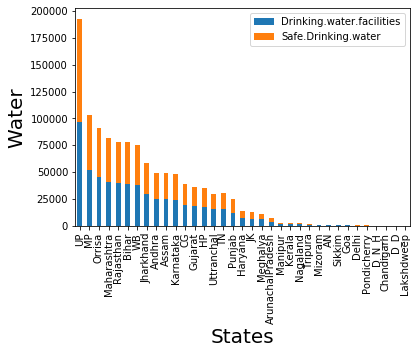

In [4]:
states=df.groupby('State').sum()
states=states[['Drinking.water.facilities','Safe.Drinking.water']]
states=states.sort_values(['Drinking.water.facilities','Safe.Drinking.water'],ascending=[0,0])
print(states)
plt.figure(figsize = (2,5))
states.plot(kind='bar' , stacked =True)
plt.xlabel("States", size = 20)
plt.ylabel("Water", size  = 20)
plt.show()